In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('500hits.csv', encoding='Latin-1')

In [3]:
df.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


<Axes: xlabel='R', ylabel='H'>

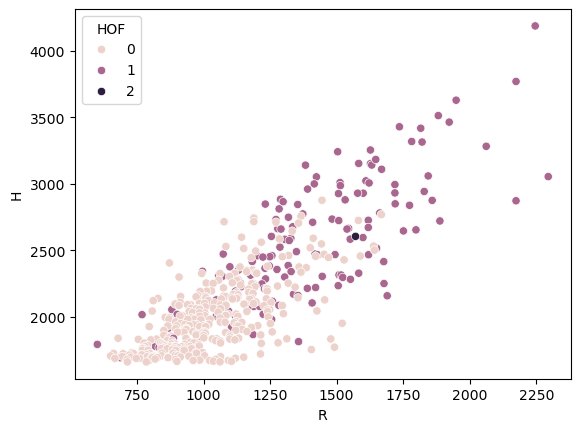

In [4]:
sns.scatterplot(data=df, x='R',y='H',hue='HOF')

<Axes: xlabel='HR', ylabel='RBI'>

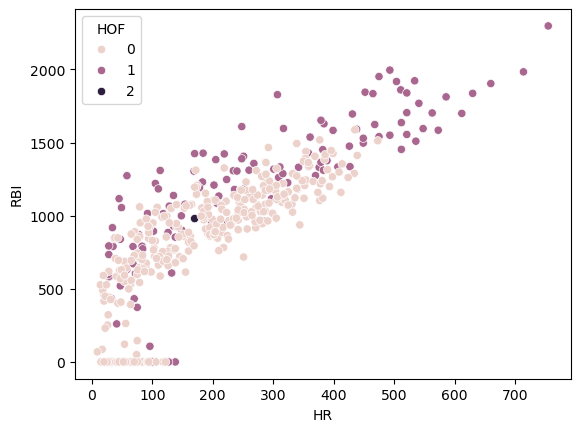

In [5]:
sns.scatterplot(data=df,x='HR',y='RBI',hue='HOF')

In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  465 non-null    object 
 1   YRS     465 non-null    int64  
 2   G       465 non-null    int64  
 3   AB      465 non-null    int64  
 4   R       465 non-null    int64  
 5   H       465 non-null    int64  
 6   2B      465 non-null    int64  
 7   3B      465 non-null    int64  
 8   HR      465 non-null    int64  
 9   RBI     465 non-null    int64  
 10  BB      465 non-null    int64  
 11  SO      465 non-null    int64  
 12  SB      465 non-null    int64  
 13  CS      465 non-null    int64  
 14  BA      465 non-null    float64
 15  HOF     465 non-null    int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 58.3+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YRS,465.0,17.049462,2.765186,11.000,15.000,17.000,19.0,26.000
G,465.0,2048.698925,354.391805,1331.000,1802.000,1993.000,2247.0,3308.000
AB,465.0,7511.455914,1294.065992,4981.000,6523.000,7241.000,8180.0,12364.000
R,465.0,1150.313978,289.635071,601.000,936.000,1104.000,1296.0,2295.000
H,465.0,2170.247312,424.190773,1660.000,1838.000,2076.000,2375.0,4189.000
2B,465.0,380.952688,96.483460,177.000,312.000,366.000,436.0,792.000
3B,465.0,78.554839,49.363030,3.000,41.000,67.000,107.0,309.000
HR,465.0,201.049462,143.622664,9.000,79.000,178.000,292.0,755.000
RBI,465.0,894.260215,486.193456,0.000,640.000,968.000,1206.0,2297.000
BB,465.0,783.561290,327.431950,239.000,535.000,736.000,955.0,2190.000


In [8]:
df.shape

(465, 16)

## LETS GO TO MACHINE LEARNING

### LETS DROP PLAYER AND CS WE NOT INTERESTED ON THEM

In [11]:
df.head(2)

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1


In [12]:
df = df.drop(columns = ['PLAYER','CS'])

In [13]:
df.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [14]:
X = df.iloc[:, 0:13] #Grabbing colums from Yrs to BA ie 0 to 13

In [15]:
y = df.iloc[:,13] #Grabbing only HOF Column which is in Column number 13

In [16]:
X.head(2)

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331


In [17]:
y.head(2)

0    1
1    1
Name: HOF, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [20]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(372, 13)

In [22]:
X_test.shape

(93, 13)

In [23]:
y_train.shape

(372,)

In [24]:
y_test.shape

(93,)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [28]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
predictions = dtc.predict(X_test)

In [30]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [31]:
y_test.head(15)

55     1
75     1
33     1
456    0
297    0
225    0
323    0
9      1
450    0
237    0
175    0
70     1
346    0
79     1
310    0
Name: HOF, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(confusion_matrix(y_test,predictions))

[[56  6]
 [ 8 23]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.79      0.74      0.77        31

    accuracy                           0.85        93
   macro avg       0.83      0.82      0.83        93
weighted avg       0.85      0.85      0.85        93



In [35]:
dtc.feature_importances_

array([0.02061659, 0.04267208, 0.03406575, 0.30221194, 0.06849412,
       0.02649226, 0.02989079, 0.02874006, 0.11624054, 0.05304438,
       0.08006275, 0.04035942, 0.15710932])

In [36]:
X.columns

Index(['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB',
       'BA'],
      dtype='object')

In [37]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns,columns=['Feature Importance'])

In [38]:
features

,Feature Importance
YRS,0.020617
G,0.042672
AB,0.034066
R,0.302212
H,0.068494
2B,0.026492
3B,0.029891
HR,0.028740
RBI,0.116241
BB,0.053044


In [39]:
features.sort_values('Feature Importance',ascending=False)

,Feature Importance
R,0.302212
BA,0.157109
RBI,0.116241
SO,0.080063
H,0.068494
BB,0.053044
G,0.042672
SB,0.040359
AB,0.034066
3B,0.029891


In [40]:
from sklearn.tree import plot_tree

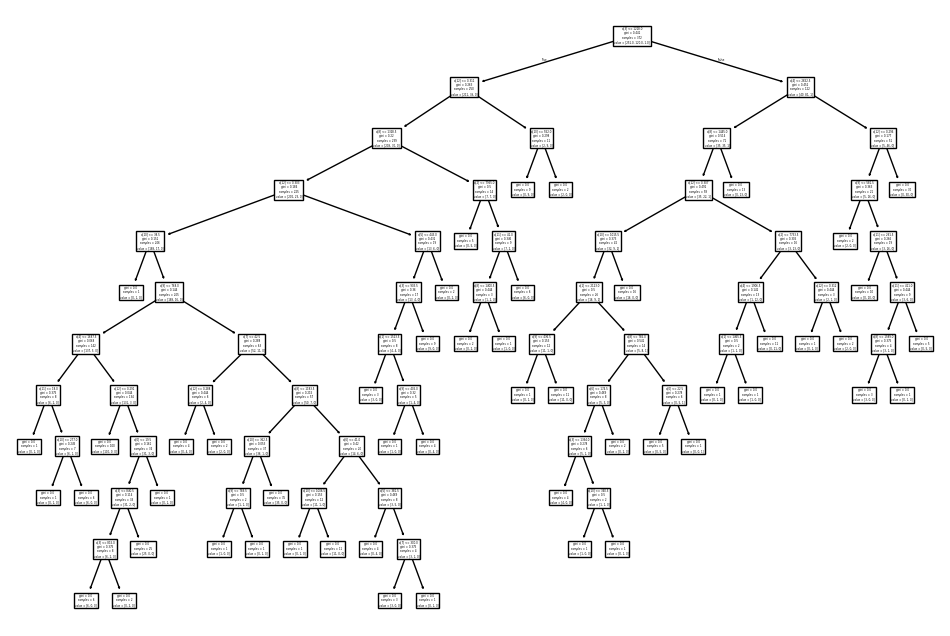

In [41]:
plt.figure(figsize=(12,8))
plot_tree(dtc);

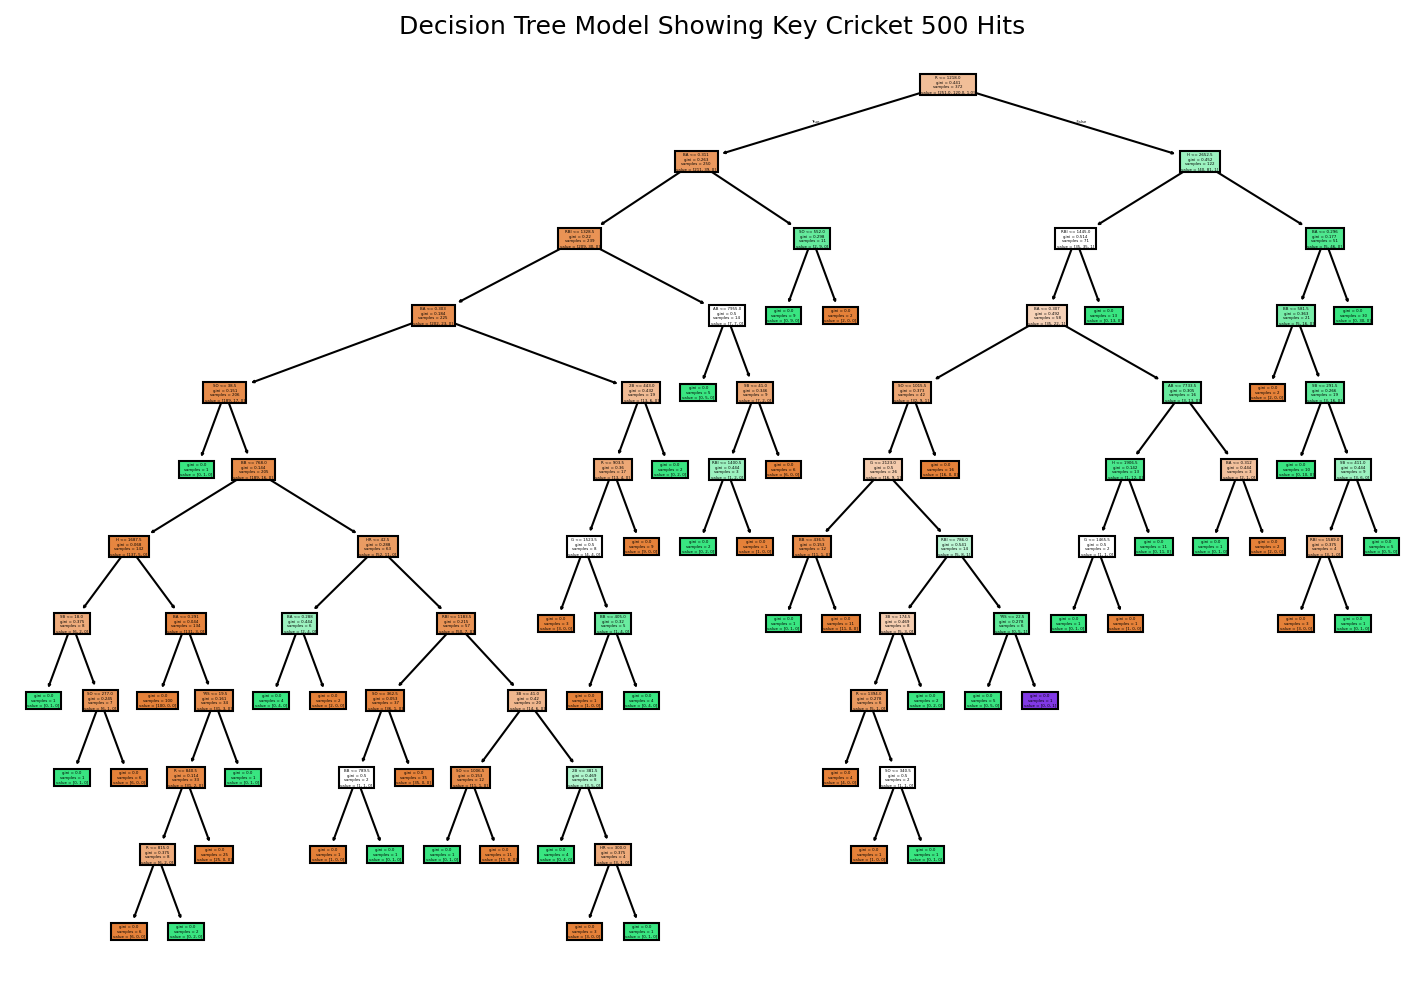

In [69]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dtc,filled=True,feature_names=X.columns);
plt.title('Decision Tree Model Showing Key Cricket 500 Hits')
# Save the graph as an image
plt.savefig('Decision_Tree', dpi=300, bbox_inches='tight')
plt.show()

In [43]:
def report_model(dtc):
    model_preds = dtc.predict(X_test)
    print(classification_report(y_test,predictions))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(dtc,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.79      0.74      0.77        31

    accuracy                           0.85        93
   macro avg       0.83      0.82      0.83        93
weighted avg       0.85      0.85      0.85        93





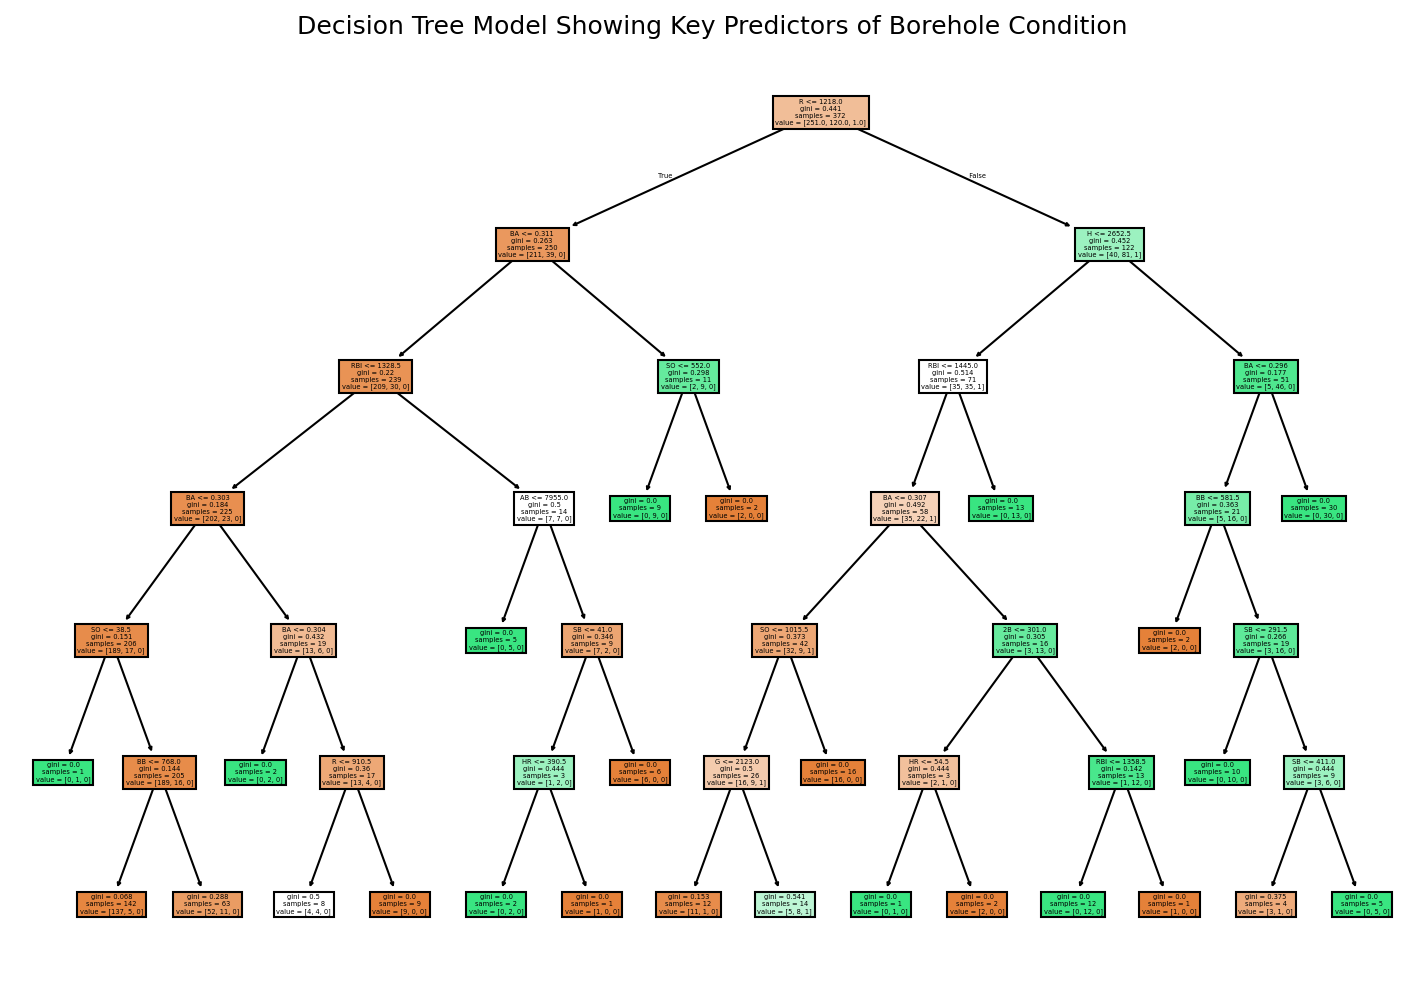

In [44]:
pruned_tree = DecisionTreeClassifier(max_depth=6)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)
plt.title('Decision Tree Model Showing Key Predictors of Borehole Condition')
# Save the graph as an image
plt.savefig('Decision_Tree', dpi=300, bbox_inches='tight')
plt.show()

## CHANGING CRITERION AND cc_alpha

In [46]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy',ccp_alpha=0.04)

In [47]:
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [48]:
predictions2 = dtc2.predict(X_test)

In [49]:
predictions2

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0], dtype=int64)

In [50]:
y_test.head(15)

55     1
75     1
33     1
456    0
297    0
225    0
323    0
9      1
450    0
237    0
175    0
70     1
346    0
79     1
310    0
Name: HOF, dtype: int64

In [51]:
print(confusion_matrix(y_test,predictions2))

[[55  7]
 [11 20]]


In [52]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.74      0.65      0.69        31

    accuracy                           0.81        93
   macro avg       0.79      0.77      0.77        93
weighted avg       0.80      0.81      0.80        93



In [60]:
features2 = pd.DataFrame(dtc2.feature_importances_,index = X.columns, columns=['Feature Importance'])

In [66]:
features2.sort_values('Feature Importance',ascending=False)

,Feature Importance
R,0.553898
BA,0.297974
RBI,0.148129
YRS,0.000000
G,0.000000
AB,0.000000
H,0.000000
2B,0.000000
3B,0.000000
HR,0.000000


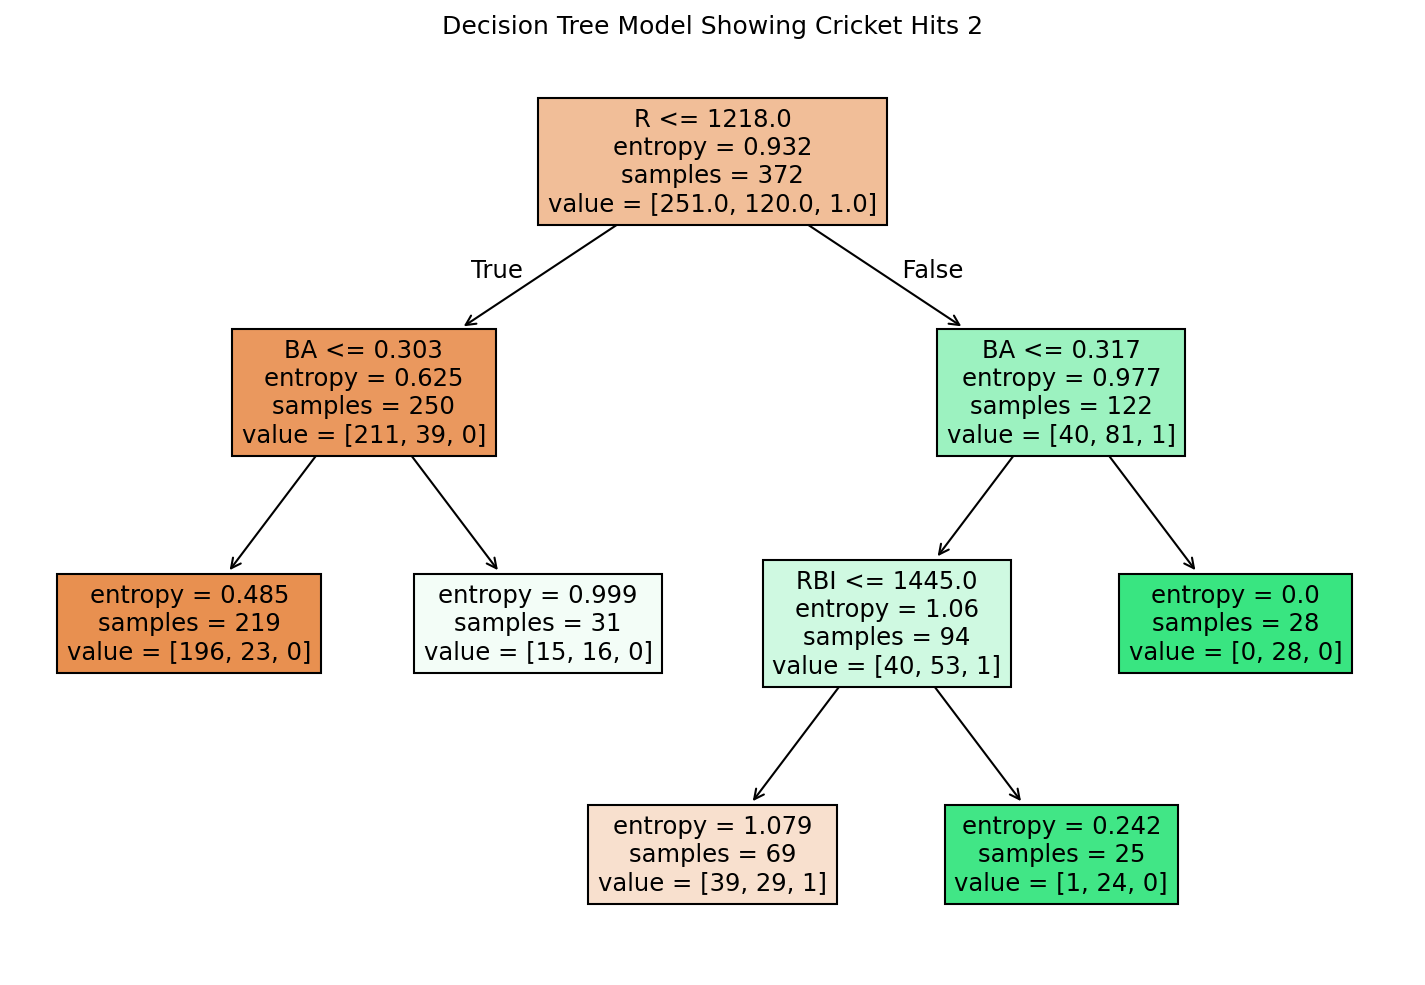

In [71]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dtc2,filled=True,feature_names=X.columns);
plt.title('Decision Tree Model Showing Cricket Hits 2')
# Save the graph as an image
plt.savefig('Decision_Tree', dpi=300, bbox_inches='tight')
plt.show()